In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import io
import time
import scipy
from scipy.ndimage import convolve
from scipy import ndimage
import getBayer

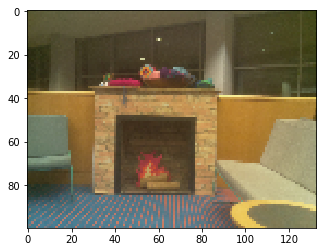

In [8]:
rgbOrig = getBayer.get_rgb_array("pic2.jpeg", height=100)
plt.imshow(rgb/255)

array([[ 0,  0,  0,  0,  0],
       [85,  0, 88,  0, 91],
       [ 0,  0,  0,  0,  0],
       [88,  0, 91,  0, 91],
       [ 0,  0,  0,  0,  0]], dtype=uint64)

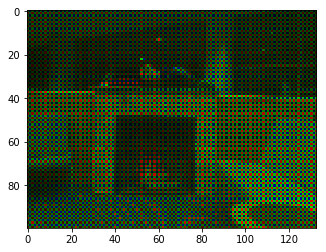

In [26]:
h, w = rgbOrig[:,:,0].shape
bayerGrid = getBayer.get_bayer_grid(height = h, width =w)

rgbBayered = bayerGrid * rgbOrig
plt.imshow(rgbBayered/255)
rgbBayered[0:5,0:5,0]

array([[ 1.,  2.,  1.,  2.,  1.],
       [ 1.,  2.,  1.,  2.,  1.],
       [ 2.,  4.,  2.,  4.,  2.],
       [ 1.,  2.,  1.,  2.,  1.],
       [ 2.,  4.,  2.,  4.,  2.]], dtype=float32)

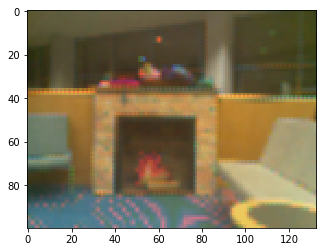

In [35]:
kernel = np.ones((3,3),dtype=np.uint8)
bilinear = getBayer.rgb_convolve(rgbBayered.astype(np.float32), kernel) 

norm = getBayer.rgb_convolve(bayerGrid.astype(np.float32), kernel)
bilinear = bilinear/norm
plt.imshow(bilinear/255)
norm[0:5,0:5,0]

In [41]:
mse = np.mean((rgbOrig - bilinear)**2)
print(mse)
psnr = 10*np.log10((255**2)/mse)
print(psnr)

162.373732243
26.0256458759
